
---
title: "Zomato Restaurant Data Analysis Report"
description: "An exploratory data analysis of Zomato's restaurant dataset."
show-code: false
hide-input: true
parameters:
  city: 
    label: "City"
    type: str
    value: "New Delhi"
---


## 📊 Introduction

This report provides an exploratory data analysis of the Zomato restaurant dataset, focusing on features such as ratings, city-wise distributions, and cuisine trends.

## 🧹 Data Cleaning

Here we handle missing values, data types, and ensure consistency in the dataset.

# Zomato Data Analysis Using Python By Pritam Nagar 

In [1]:
# Importing Needed Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing Data set

dataFrame = pd.read_csv("Zomato data .csv")
dataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
dataFrame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [6]:
dataFrame.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
# late convert 'rate' column data type to flot and remove the denominator

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataFrame['rate'] = dataFrame['rate'].apply(handleRate)
dataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
# Now Info of dataset
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [10]:
dataFrame.isnull()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False


In [11]:
dataFrame.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# So Now There is no null values in dataFrame

# Staring Data Visulization 

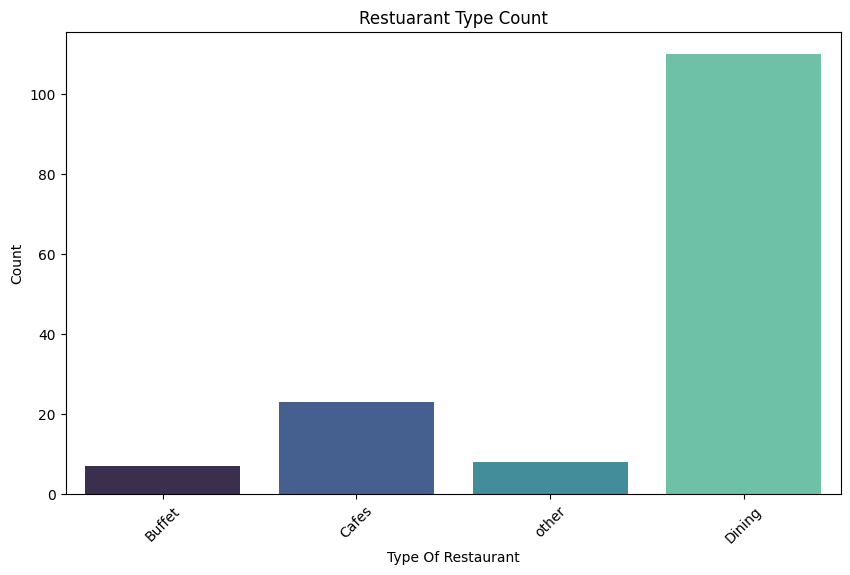

In [15]:
# Type OF Restaurant
plt.figure(figsize=(10,6))
sns.countplot(data = dataFrame,
              x = dataFrame['listed_in(type)'],
              hue = dataFrame['listed_in(type)'],
              palette="mako",
             legend=False)
plt.xlabel("Type Of Restaurant")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Restuarant Type Count")
plt.show()


# Conclusion : Majority of restaurant fall into dining category
# Dining Restaurants are preferred by a larger number of individuals

Text(0, 0.5, 'Votes')

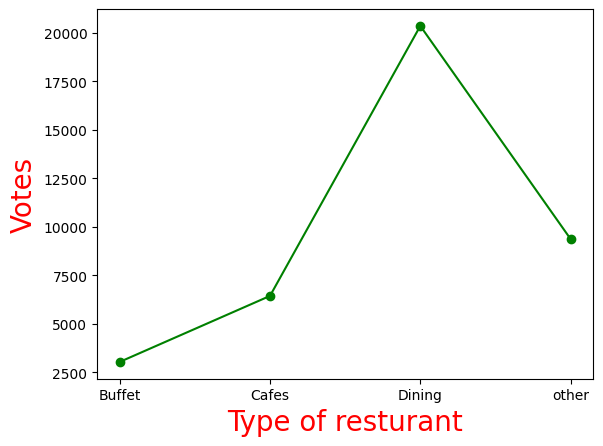

In [18]:
grouped_data = dataFrame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green", marker="o")
plt.xlabel("Type of resturant", c="red", size=20)
plt.ylabel("Votes", c ="red", size = 20)

# The majority of resturant received ratings

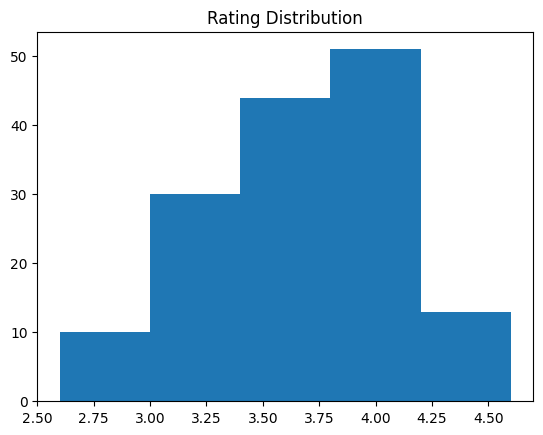

In [19]:
plt.hist(dataFrame['rate'], bins=5)
plt.title("Rating Distribution")
plt.show()

# Conclusion : Majority of rstaurants received ratings rang from 3.5⭐ to 4⭐

# Majority of couples prefer restaurant with an approximate cost of 300 rupees

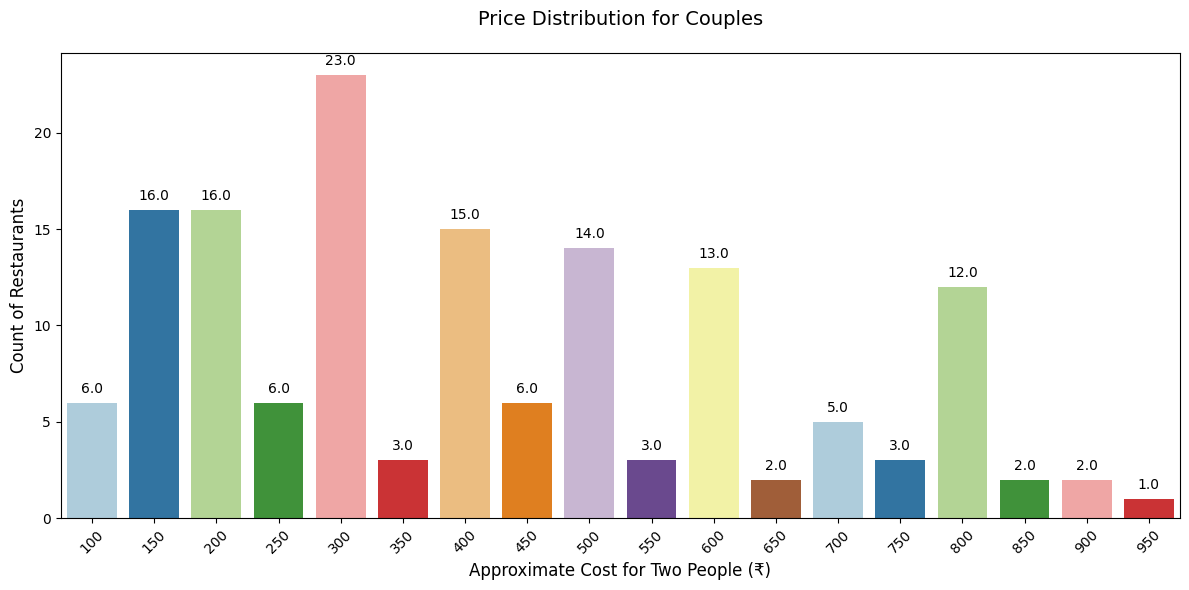

In [29]:
couple_data = dataFrame['approx_cost(for two people)']
plt.figure(figsize=(12,6))

# Create the plot and store the axes object
ax = sns.countplot(
    x=couple_data,
    hue=couple_data,
    palette="Paired",
    legend=False
)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',         
        va='bottom',       
        xytext=(0, 5),     
        textcoords='offset points',
        fontsize=10
    )

# Axis labels and title
plt.xlabel("Approximate Cost for Two People (₹)", fontsize=12)
plt.ylabel("Count of Restaurants", fontsize=12)
plt.title("Price Distribution for Couples", fontsize=14, pad=20)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
  

# Whether online order receive higher ratings than offline orders

Text(0, 0.5, 'Rating (0-5)')

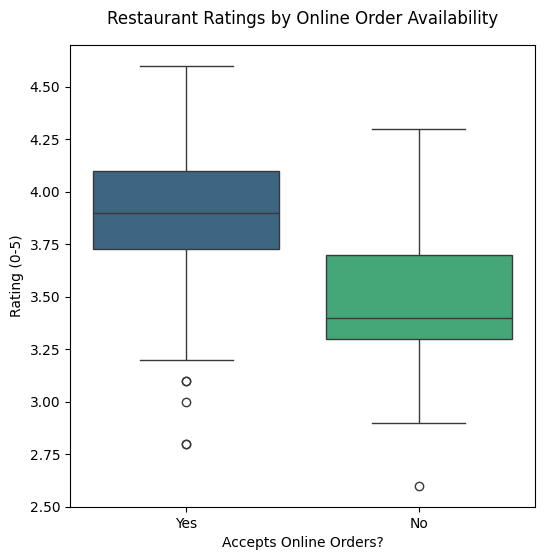

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y ='rate', data = dataFrame, palette="viridis",
           hue='online_order', legend=False)
plt.title("Restaurant Ratings by Online Order Availability", pad=15)
plt.xlabel("Accepts Online Orders?")
plt.ylabel("Rating (0-5)")

# Conclusion : Offline order received lower ratings in compare to online order, which obtained excellent ratings.

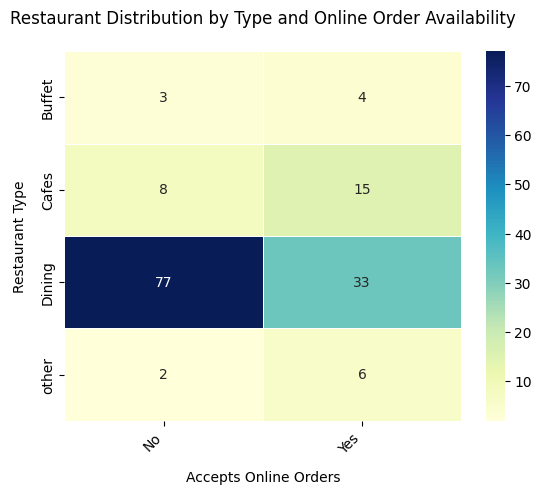

In [41]:
pivot_table = dataFrame.pivot_table(index='listed_in(type)',
                                    columns = 'online_order',
                                   values='rate',
                                   aggfunc='count')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='g',linewidths=.5, annot_kws={'size':10})
plt.title("Restaurant Distribution by Type and Online Order Availability", pad=20)
plt.xlabel("Accepts Online Orders", labelpad=10)
plt.ylabel("Restaurant Type", labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.show()

# Conclusion : Dining restaurant primarily accept offline orders , where cafes primarily recive online orders. This suggest that clients prefer to place orders in person at restaurants , but perfer online ordering at cafes

## 📈 Exploratory Data Analysis (EDA)

In this section, we explore various features such as location distribution, ratings, and cuisine types through visualizations.

## 💡 Key Insights

We summarize interesting findings from the dataset, such as most popular cuisines, highest-rated restaurants, and top cities.

## 🏁 Conclusion

This analysis provides useful insights into restaurant trends and customer preferences based on the Zomato dataset.